# Task - 4



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________

data = pd.read_csv('train.csv')
data.head(5)

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

# ______________________________
# ______________________________

data.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [5]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## 2. Cleaning the Data

In [6]:
data['Health Indicator'].value_counts()  

X1    2559
X2    2028
X3    1344
X4    1090
X5     343
X6     248
X7      34
X8      13
X9      12
Name: Health Indicator, dtype: int64

In [7]:
data['Holding_Policy_Duration'].value_counts()

14+    898
1      867
2      790
3      696
4      530
5      461
6      374
7      320
8      254
9      205
10     166
12     104
13     103
11      89
14      89
Name: Holding_Policy_Duration, dtype: int64

In [8]:
data['Holding_Policy_Type'].value_counts()

3.0    2573
1.0    1602
2.0     973
4.0     798
Name: Holding_Policy_Type, dtype: int64

In [9]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# -> if categrical :  Fill  "Mode"
# -> in  Neumerical : "Median" Always (because the mean will not be affected by the median)

  
data['Health Indicator'].fillna('X1',inplace=True)

# Holding_Policy_Duration

data['Holding_Policy_Duration'].replace('14+','15',inplace=True)
data['Holding_Policy_Duration'].fillna('15',inplace=True)

# Holding_Policy_Type

data['Holding_Policy_Type'].fillna(3.0,inplace=True)


In [10]:
data.isnull().sum()

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [11]:
# Check again Holding_Policy_Duration is in object column convert that into int

print(data['Holding_Policy_Duration'].dtype)

print('')

# Check again Holding_Policy_Duration is in object column convert that into int

data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].astype('int')

data['Holding_Policy_Duration'].dtypes

object



dtype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [13]:
Categorical_column = data.columns[(data.dtypes == 'object').values]
print('Categorical_column : ')
print(Categorical_column)

print('')

#Numericalcolumns values in the DataFrame
Numerical_column = data.columns[(data.dtypes !='object').values]
print('Numerical_column :' )
print(Numerical_column)

Categorical_column : 
Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator'],
      dtype='object')

Numerical_column :
Index(['Unnamed: 0', 'ID', 'Region_Code', 'Upper_Age', 'Lower_Age',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')


In [14]:
print("Number of Unique values in the Column wise")
for i in Categorical_column:
    print(""+str(i)+" - ",data[''+str(i)+''].nunique())#,data[''+str(i)+''].unique()
  

Number of Unique values in the Column wise
City_Code -  36
Accomodation_Type -  2
Reco_Insurance_Type -  2
Is_Spouse -  2
Health Indicator -  9


In [15]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No

print(data['Accomodation_Type'].value_counts())

print('')

print(data['Reco_Insurance_Type'].value_counts())

print('')

print(data['Is_Spouse'].value_counts())

Owned     5509
Rented    4491
Name: Accomodation_Type, dtype: int64

Individual    7956
Joint         2044
Name: Reco_Insurance_Type, dtype: int64

No     8318
Yes    1682
Name: Is_Spouse, dtype: int64


In [16]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
    
data['Is_Spouse'] = data['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)
data['Is_Spouse'].dtypes


dtype('int64')

In [17]:
# Now again having a look at all those columns to see if everything went well

data.select_dtypes(include=['object'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health Indicator
0,C3,Owned,Individual,X1
1,C3,Owned,Individual,X6
2,C1,Rented,Individual,X1
3,C26,Rented,Individual,X1
4,C2,Owned,Joint,X1
...,...,...,...,...
9995,C3,Owned,Joint,X5
9996,C5,Rented,Individual,X1
9997,C1,Owned,Individual,X1
9998,C1,Rented,Individual,X5


In [18]:
# Observe that all those columns are now converted from Object to Int64

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [19]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

print("Number of Unique values in the Column wise")
for i in Categorical_column:
    print(""+str(i)+" - ",data[''+str(i)+''].nunique())#,data[''+str(i)+''].unique()


Number of Unique values in the Column wise
City_Code -  36
Accomodation_Type -  2
Reco_Insurance_Type -  2
Is_Spouse -  2
Health Indicator -  9


In [20]:
# You can also do this to separate Object columns

# ____________________________

data.select_dtypes(include=['object'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health Indicator
0,C3,Owned,Individual,X1
1,C3,Owned,Individual,X6
2,C1,Rented,Individual,X1
3,C26,Rented,Individual,X1
4,C2,Owned,Joint,X1
...,...,...,...,...
9995,C3,Owned,Joint,X5
9996,C5,Rented,Individual,X1
9997,C1,Owned,Individual,X1
9998,C1,Rented,Individual,X5


In [21]:
# Lets just try to see what is happening Response. Check the output.

data['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [22]:
print(data.shape)

# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape

data.drop(['Unnamed: 0'],axis=1,inplace=True)

print('')

print(data.shape)


(10000, 15)

(10000, 14)


In [23]:
# Getting all the Object Dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   City_Code                10000 non-null  object 
 2   Region_Code              10000 non-null  int64  
 3   Accomodation_Type        10000 non-null  object 
 4   Reco_Insurance_Type      10000 non-null  object 
 5   Upper_Age                10000 non-null  int64  
 6   Lower_Age                10000 non-null  int64  
 7   Is_Spouse                10000 non-null  int64  
 8   Health Indicator         10000 non-null  object 
 9   Holding_Policy_Duration  10000 non-null  int64  
 10  Holding_Policy_Type      10000 non-null  float64
 11  Reco_Policy_Cat          10000 non-null  int64  
 12  Reco_Policy_Premium      10000 non-null  float64
 13  Response                 10000 non-null  int64  
dtypes: float64(2), int64(8)

In [24]:
print("Number of Unique values in the Column wise")
for i in Categorical_column:
    print(""+str(i)+" - ",data[''+str(i)+''].nunique(),data[''+str(i)+''].unique())
    print('')
    #print(data[''+str(i)+''].unique())



Number of Unique values in the Column wise
City_Code -  36 ['C3' 'C1' 'C26' 'C2' 'C17' 'C4' 'C16' 'C9' 'C23' 'C21' 'C6' 'C7' 'C11'
 'C22' 'C15' 'C13' 'C8' 'C35' 'C29' 'C33' 'C10' 'C12' 'C19' 'C5' 'C18'
 'C14' 'C24' 'C27' 'C20' 'C34' 'C36' 'C25' 'C28' 'C32' 'C30' 'C31']

Accomodation_Type -  2 ['Owned' 'Rented']

Reco_Insurance_Type -  2 ['Individual' 'Joint']

Is_Spouse -  2 [0 1]

Health Indicator -  9 ['X1' 'X6' 'X4' 'X2' 'X3' 'X5' 'X8' 'X7' 'X9']



In [25]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data['City_Code'] = LE.fit_transform(data['City_Code'])
data['Accomodation_Type'] = LE.fit_transform(data['Accomodation_Type'])
data['Reco_Insurance_Type'] = LE.fit_transform(data['Reco_Insurance_Type'])
data['Health Indicator'] = LE.fit_transform(data['Health Indicator'])

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   City_Code                10000 non-null  int64  
 2   Region_Code              10000 non-null  int64  
 3   Accomodation_Type        10000 non-null  int64  
 4   Reco_Insurance_Type      10000 non-null  int64  
 5   Upper_Age                10000 non-null  int64  
 6   Lower_Age                10000 non-null  int64  
 7   Is_Spouse                10000 non-null  int64  
 8   Health Indicator         10000 non-null  int64  
 9   Holding_Policy_Duration  10000 non-null  int64  
 10  Holding_Policy_Type      10000 non-null  float64
 11  Reco_Policy_Cat          10000 non-null  int64  
 12  Reco_Policy_Premium      10000 non-null  float64
 13  Response                 10000 non-null  int64  
dtypes: float64(2), int64(12

In [26]:
data.describe()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25514.420300,14.948200,1723.510900,0.449100,0.204400,44.765600,42.65650,0.168200,1.098900,9.807300,2.662100,15.090700,14182.681460,0.245900
std,14789.327793,12.201328,1416.809648,0.497427,0.403283,17.281705,17.31614,0.374062,1.394888,5.673604,0.838924,6.350237,6538.837384,0.430641
min,8.000000,0.000000,1.000000,0.000000,0.000000,18.000000,16.00000,0.000000,0.000000,1.000000,1.000000,1.000000,2280.000000,0.000000
25%,12519.250000,3.000000,517.000000,0.000000,0.000000,28.000000,27.00000,0.000000,0.000000,4.000000,2.000000,12.000000,9278.400000,0.000000
50%,25512.500000,11.000000,1382.000000,0.000000,0.000000,44.000000,40.00000,0.000000,1.000000,14.000000,3.000000,17.000000,13214.000000,0.000000
75%,38330.750000,30.000000,2637.000000,1.000000,0.000000,59.000000,57.00000,0.000000,2.000000,15.000000,3.000000,20.000000,18070.000000,0.000000
max,50874.000000,35.000000,6193.000000,1.000000,1.000000,75.000000,75.00000,1.000000,8.000000,15.000000,4.000000,22.000000,42256.000000,1.000000


In [27]:
print("Number of Unique values in the Column wise")
for i in Categorical_column:
    print(""+str(i)+" - ",data[''+str(i)+''].nunique(),data[''+str(i)+''].unique())
    print('')
    #print(data[''+str(i)+''].unique())



Number of Unique values in the Column wise
City_Code -  36 [22  0 18 11  8 30  7 35 15 13 32 33  2 14  6  4 34 28 21 26  1  3 10 31
  9  5 16 19 12 27 29 17 20 25 23 24]

Accomodation_Type -  2 [0 1]

Reco_Insurance_Type -  2 [0 1]

Is_Spouse -  2 [0 1]

Health Indicator -  9 [0 5 3 1 2 4 7 6 8]



In [28]:
pd.get_dummies(data,columns=['Accomodation_Type','Reco_Insurance_Type','Health Indicator'])

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,...,Reco_Insurance_Type_1,Health Indicator_0,Health Indicator_1,Health Indicator_2,Health Indicator_3,Health Indicator_4,Health Indicator_5,Health Indicator_6,Health Indicator_7,Health Indicator_8
0,27386,22,64,36,36,0,15,2.0,16,13320.0,...,0,1,0,0,0,0,0,0,0,0
1,33500,22,2955,66,66,0,10,1.0,19,16152.0,...,0,0,0,0,0,0,1,0,0,0
2,7998,0,1542,24,24,0,3,1.0,16,7310.0,...,0,1,0,0,0,0,0,0,0,0
3,33033,18,772,75,75,0,1,3.0,16,15792.0,...,0,1,0,0,0,0,0,0,0,0
4,30517,11,1510,59,58,1,15,4.0,17,23673.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,22,13,47,40,1,15,3.0,19,27840.0,...,1,0,0,0,0,1,0,0,0,0
9996,35449,31,1477,34,34,0,6,1.0,4,10560.0,...,0,1,0,0,0,0,0,0,0,0
9997,47254,0,2357,64,64,0,8,2.0,19,14716.0,...,0,1,0,0,0,0,0,0,0,0
9998,42545,0,1443,53,53,0,15,3.0,13,11664.0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
from sklearn.preprocessing import OneHotEncoder
one_coding = OneHotEncoder()
#data_for_OHE = pd.get_dummies(data,columns=['Accomodation_Type','Reco_Insurance_Type','Health Indicator'])
#data_for_OHE.columns

#data_for_OHE.head(2)


In [30]:
data.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [31]:
# Concatinating the original data frame and onehot encoded dataframe

# use pd.concat to join the new columns with your original dataframe
data_1 = pd.concat([pd.get_dummies(data, columns=['Accomodation_Type','Reco_Insurance_Type','Health Indicator'])],axis=1)


#data_1.drop(['Accomodation_Type', 'Reco_Insurance_Type','Health Indicator'],axis=1, inplace=True)



In [32]:
data_1.columns

Index(['ID', 'City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'Accomodation_Type_0',
       'Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1',
       'Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2',
       'Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5',
       'Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8'],
      dtype='object')

In [33]:
# Drop all the unwanted columns.

data_1.drop(['ID'],axis=1,inplace=True)

# Because we have already encoded them and added to main dataframe

data_1.shape

(10000, 23)

## checking the responce column

In [34]:
data_1['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

0    7541
1    2459
Name: Response, dtype: int64


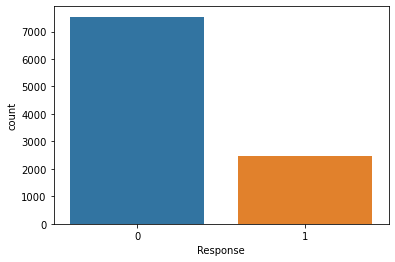

In [35]:
sns.countplot(x = 'Response' , data = data_1)

print(data_1['Response'].value_counts())

In [36]:
print(100*(2459/float(data_1.shape[0])))

print('')

print(100*(7541/float(data_1.shape[0])))

24.59

75.41


# --
    Here , this col has imbalancely distributed SO , since this column is our "Y" we have to balance this column for further process. lets see without imbalancing what output we get.., then balance the column and check what output we get....

# logestic regression :

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# to ignore warnings

In [38]:
data_1 = data_1[['City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Reco_Policy_Premium', 'Accomodation_Type_0','Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1','Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2','Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5','Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8', 'Response']]



              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1862
           1       0.00      0.00      0.00       638

    accuracy                           0.74      2500
   macro avg       0.37      0.50      0.43      2500
weighted avg       0.55      0.74      0.64      2500


0.5


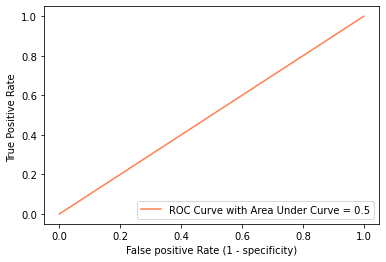

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Features selection 
X = data_1.iloc[:,:-1]
y = data_1.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(classification_report (y_test, y_pred))
print('')

from sklearn.metrics import roc_curve,auc

[fpr, tpr, thr] = roc_curve(y_test, y_pred)
print(auc (fpr, tpr))


plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# observation:
    
    As u see in classification_report - accuracy is 74 which is not good and precision & recall is 0 THIS is not good model we need to deal with dep column for good acc and good model.
    
    if we proceed with imbalanced dataset we dont get good model. so to get better model we need to change that. and make balanced dataset and proceed for further steps and perform models  
    

In [40]:
data_1.columns


Index(['City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Accomodation_Type_0', 'Accomodation_Type_1',
       'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1', 'Health Indicator_0',
       'Health Indicator_1', 'Health Indicator_2', 'Health Indicator_3',
       'Health Indicator_4', 'Health Indicator_5', 'Health Indicator_6',
       'Health Indicator_7', 'Health Indicator_8', 'Response'],
      dtype='object')

In [41]:
data_1.shape

(10000, 23)

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
### Inabalance Independent Veriable : 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()    #SMOTE : Synthetic minority oversampling technique (inbalance Data Handling)

X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

print(X_train_smote.shape)
print(y_train_smote.shape)

(11358, 22)
(11358,)


In [45]:
# After balancing Independent Veriable
y_train_smote.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Response, dtype: float64

# --
    Now the column is distributed equally lets check the result ...

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [46]:
cols = [ 'City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Reco_Policy_Premium', 'Accomodation_Type_0','Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1','Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2','Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5','Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8']



In [47]:
# Features selection 
X = data_1.iloc[:,:-1]
y = data_1.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44)

print(len(data_1))

print('X: ', len(X))

print('y: ', len(y))
                 
print('')

print('X_TRAIN : ',X_train.shape)
print('y_TRAIN : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

10000
X:  10000
y:  10000

X_TRAIN :  (8000, 22)
y_TRAIN :  (8000,)
X_test :  (2000, 22)
y_test :  (2000,)


In [48]:
# Features selection 
X = data_1[cols]
y = data_1['Response']

In [49]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(11358, 22)
(11358,)


In [50]:
print('X_TRAIN : ',X_train.shape)
print('y_TRAIN : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_TRAIN :  (8000, 22)
y_TRAIN :  (8000,)
X_test :  (2000, 22)
y_test :  (2000,)


## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

# 1. logestic regression

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [52]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_smote,y_train_smote)

y_pred_for_log = log_reg.predict(X_test)

print('Model:', log_reg)

print('')
print('for test:')

print(' Logistic Regression Model Accuracy : ', accuracy_score(y_pred_for_log,y_test))

print('')

confusion_matrix(y_pred_for_log,y_test)

Model: LogisticRegression()

for test:
 Logistic Regression Model Accuracy :  0.5155



array([[744, 218],
       [751, 287]])

recall_score_for_log :  0.2764932562620424

precision_score_for_log :  0.5683168316831683

              precision    recall  f1-score   support

           0       0.50      0.77      0.61       962
           1       0.57      0.28      0.37      1038

    accuracy                           0.52      2000
   macro avg       0.53      0.52      0.49      2000
weighted avg       0.53      0.52      0.48      2000

auc :  0.5329878472797113


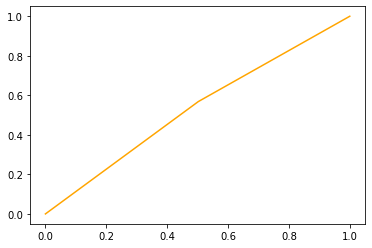

In [53]:
from sklearn.metrics import recall_score
print('recall_score_for_log : ',recall_score(y_pred_for_log,y_test))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_log : ',precision_score(y_pred_for_log,y_test))

print('')

print(classification_report(y_pred_for_log,y_test))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_log)

#auc = Area Under Curve
from sklearn.metrics import auc
print('auc : ' ,auc(FPR,TPR))

plt.plot(FPR,TPR,color='orange',label='ROC')

# hyper-parameter tuning for logistic

    Logistic regression does not really have any critical hyperparameters to tune. Sometimes, 
    you can see useful differences in performance or convergence with different solvers (solver). 
    Regularization (penalty) can sometimes be helpful.

1. solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

2. penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

3. C in [100, 10, 1.0, 0.1, 0.01]

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters

solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid_search_for_log = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_search_for_log, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_search.fit(X_train_smote,y_train_smote)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [55]:
grid_search.best_score_

0.7893410942896736

In [56]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

# model building

In [57]:
log_reg2 = grid_search.best_estimator_

log_reg2.fit(X_train_smote,y_train_smote)

y_pred_for_log_reg2 = log_reg2.predict(X_test)


In [58]:
#print('Training set accuracy: ', metrics.accuracy_score(y_train_smote, y_hat_knn2))
print('Test set accuracy : ', accuracy_score(y_pred_for_log_reg2, y_test))

print('')

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_for_log_reg2))

print('')
from sklearn.metrics import recall_score
print('recall_score_for_log_reg2 : ',recall_score(y_test, y_pred_for_log_reg2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_log_reg2 : ',precision_score(y_test, y_pred_for_log_reg2))


Test set accuracy :  0.747

[[1492    3]
 [ 503    2]]

recall_score_for_log_reg2 :  0.0039603960396039604

precision_score_for_log_reg2 :  0.4


# observations :
    
    before balancing the y col = responce the output is like this
        acc = 0.74 
        precision = 0.00
        recall = 0.00
-->

    After balancing the col : (base model)
        
            acc = 0.53
            precision = 0.49
            recall = 0.26
->
    
    AFTER applying hyper parametrs to the base model the output is 
        
        acc = 74.3
        precision = 0.235
        recall = 0.0079

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

# KNN

In [59]:
#KNN also a used for Regression Technique. i hope it will help to find Prediction with best accuracy

#Import Libaries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()


knn.fit(X_train_smote,y_train_smote)

y_pred_for_knn = knn.predict(X_test)


print('Model:', knn)

print('')
print('for test:')
      
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred_for_knn,y_test))

print('')

confusion_matrix(y_pred_for_knn,y_test)

Model: KNeighborsClassifier()

for test:
KNeighborsClassifier Model Accuracy :  0.519



array([[831, 298],
       [664, 207]])

In [60]:
from sklearn.metrics import recall_score
print('recall_score_for_knn : ',recall_score(y_test, y_pred_for_knn))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_knn : ',precision_score(y_test, y_pred_for_knn))

print('')

print(classification_report(y_pred_for_knn,y_test))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_knn)

#auc = Area Under Curve
from sklearn.metrics import auc
print('auc : ' ,auc(FPR,TPR))



recall_score_for_knn :  0.4099009900990099

precision_score_for_knn :  0.23765786452353616

              precision    recall  f1-score   support

           0       0.56      0.74      0.63      1129
           1       0.41      0.24      0.30       871

    accuracy                           0.52      2000
   macro avg       0.48      0.49      0.47      2000
weighted avg       0.49      0.52      0.49      2000

auc :  0.4828769164541872


# Hyper-Parameter tuning for knn

# --
    n_neighbors: Decide the best k based on the values we have computed earlier.
    
    weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
    
    metric: The distance metric to be used will calculating the similarity.

In [61]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
              }

grid_search_for_knn = GridSearchCV(KNeighborsClassifier(), grid_params , cv=3)

# fit the model on our train set
#grid_result
grid_search_for_knn.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [62]:
# find the best score
print('best score: ',grid_search_for_knn.best_score_)

print('')

# get the hyperparameters with the best score
print('best parameters for knn : ',grid_search_for_knn.best_params_)

best score:  0.7102482831484416

best parameters for knn :  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


# model evaluation

In [63]:
# use the best hyperparameters

knn2 = KNeighborsClassifier(n_neighbors = 5, weights = 'distance' ,metric = 'manhattan')

#knn2 = grid_search_for_knn.best_params_

knn2.fit(X_train_smote,y_train_smote)

# get a prediction
y_hat_knn2 = knn2.predict(X_train_smote)

y_pred_for_knn2 = knn2.predict(X_test)

In [64]:
#print('Training set accuracy: ', metrics.accuracy_score(y_train_smote, y_hat_knn2))
print('Test set accuracy : ', accuracy_score(y_pred_for_knn2, y_test))

print('')

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_for_knn2))

print('')
from sklearn.metrics import recall_score
print('recall_score_for_knn2 : ',recall_score(y_test, y_pred_for_knn2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_knn2 : ',precision_score(y_test, y_pred_for_knn2))


Test set accuracy :  0.5345

[[854 641]
 [290 215]]

recall_score_for_knn2 :  0.42574257425742573

precision_score_for_knn2 :  0.25116822429906543


# DECISION TREE

In [65]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()


decision_tree.fit(X_train_smote,y_train_smote)

y_pred_for_DT = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

print(decision_tree)

print('')

print('for test:', )

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_for_DT,y_test))

confusion_matrix(y_pred_for_DT,y_test)


DecisionTreeClassifier()

for test:
DecisionTreeClassifier Model Accuracy :  0.642


array([[1094,  315],
       [ 401,  190]])

In [66]:
from sklearn.metrics import recall_score
print('recall_score_for_DT : ',recall_score(y_test, y_pred_for_DT))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_DT : ',precision_score(y_test, y_pred_for_DT))

print('')

print(classification_report(y_pred_for_DT,y_test))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_DT)

#auc = Area Under Curve
from sklearn.metrics import auc
print('auc : ' ,auc(FPR,TPR))


recall_score_for_DT :  0.37623762376237624

precision_score_for_DT :  0.32148900169204736

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1409
           1       0.38      0.32      0.35       591

    accuracy                           0.64      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.63      0.64      0.63      2000

auc :  0.5540050995066061


# hyper parameter tuning for DT

# --
    max_depth
    min_samples_leaf
    criterion : ["gini", "entropy"]
    min_impurity_split

In [67]:
###
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [2,3,5,10,20],
              "min_samples_leaf": [1, 2 ,5 ,9],
              "criterion": ["gini", "entropy"]
             }
  
# Instantiating Decision Tree classifier
decision_tree = DecisionTreeClassifier()
print(decision_tree)

print('')

  
grid_Search = GridSearchCV(decision_tree, param_dist, cv = 3)

grid_model = grid_Search.fit(X_train_smote,y_train_smote)

grid_model.best_estimator_

DecisionTreeClassifier()



DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [68]:
# find the best score
print('best score: ',grid_model.best_score_)

print('')

# get the hyperparameters with the best params/estimator same
print('best parameters for DT : ',grid_model.best_params_)

best score:  0.7429124845923578

best parameters for DT :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


In [69]:


# With the Best HyperTunning Parameter
dt2 = grid_model.best_estimator_

#dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
dt2.fit(X_train_smote,y_train_smote)

y_pred_FOR_DT2 = dt2.predict(X_test)

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_FOR_DT2,y_test))

print('')

from sklearn.metrics import recall_score
print('recall_score_for_DT2 : ',recall_score(y_test, y_pred_FOR_DT2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_DT2 : ',precision_score(y_test, y_pred_FOR_DT2))

DecisionTreeClassifier Model Accuracy :  0.715

recall_score_for_DT2 :  0.09108910891089109

precision_score_for_DT2 :  0.2929936305732484


# RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=10)


Random_Forest.fit(X_train_smote,y_train_smote)

y_pred_for_RF = Random_Forest.predict(X_test)

print( Random_Forest)

print('')
print('for test:')

print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_pred_for_RF,y_test))

confusion_matrix(y_pred_for_RF,y_test)

RandomForestClassifier(n_estimators=10)

for test:
RandomForestClassifier Model Accuracy :  0.7115


array([[1360,  442],
       [ 135,   63]])

In [71]:
from sklearn.metrics import recall_score
print('recall_score_for_RF : ',recall_score(y_test, y_pred_for_RF))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_RF : ',precision_score(y_test, y_pred_for_RF))

print('')

print(classification_report(y_test, y_pred_for_RF))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_RF)

#auc = Area Under Curve
from sklearn.metrics import auc
print('auc : ' ,auc(FPR,TPR))


recall_score_for_RF :  0.12475247524752475

precision_score_for_RF :  0.3181818181818182

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1495
           1       0.32      0.12      0.18       505

    accuracy                           0.71      2000
   macro avg       0.54      0.52      0.50      2000
weighted avg       0.64      0.71      0.66      2000

auc :  0.5172257359515217


# hyper-parameter tuning for random_forest

# --
used hyper parameters:

    1.max_depth
    2.min_sample_split
    3.max_leaf_nodes
    4.min_samples_leaf
    5.n_estimators
    6.max_sample (bootstrap sample)
    7.max_features (auto, sqrt)
    

In [72]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier()
Random_Forest.get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [1,10,100,200,400,1000] #1tree, 10 tree, 100 tree.....
max_features = ['auto', 'sqrt']
max_depth = [3,6,10]
min_samples_leaf = [1,2,4,10]

random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf
}
random_grid




{'n_estimators': [1, 10, 100, 200, 400, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 6, 10],
 'min_samples_leaf': [1, 2, 4, 10]}

In [74]:

Random_Forest_randomgrid = RandomizedSearchCV(estimator = Random_Forest, param_distributions=random_grid, cv=3, verbose=2)
Random_Forest_randomgrid.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   4.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   3.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=400; total time=   4.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=1000; total time=   7.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=1000; total time=   6.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=1000; total time=   6.1s
[CV] END max_depth=3, max_features=sqrt, min_sample

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 6, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'n_estimators': [1, 10, 100, 200, 400,
                                                         1000]},
                   verbose=2)

In [75]:
print(Random_Forest_randomgrid.best_params_)

print('')

print(Random_Forest_randomgrid.best_score_)

{'n_estimators': 400, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}

0.7923930269413629


In [76]:
Random_Forest_1 = RandomForestClassifier(n_estimators = 400 , min_samples_leaf=2 , max_features='auto', max_depth=6)
Random_Forest_1.fit(X_train_smote, y_train_smote)
y_pred_for_RF2 = Random_Forest_1.predict(X_test)

print(' test_Accuarcy_for_RF2 : ',accuracy_score(y_test,y_pred_for_RF2)*100,'%')

print('')

print('recall_score_for_RF2 : ',recall_score(y_test, y_pred_for_RF2))

print('')

print('precision_score_for_RF2 : ',precision_score(y_test, y_pred_for_RF2))


 test_Accuarcy_for_RF2 :  70.75 %

recall_score_for_RF2 :  0.10297029702970296

precision_score_for_RF2 :  0.2826086956521739


In [ ]:
x,y

smote for x&y 

train test for xy

re

# GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

Grad_Boosting = GradientBoostingClassifier()

Grad_Boosting.fit(X_train_smote,y_train_smote)

y_pred_for_GB = Grad_Boosting.predict(X_test)

print( Grad_Boosting)

print('')

print('for test:')

print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_pred_for_GB,y_test))

confusion_matrix(y_pred_for_GB,y_test)

GradientBoostingClassifier()

for test:
GradientBoostingClassifier Model Accuracy :  0.7415


array([[1475,  497],
       [  20,    8]])

In [78]:
from sklearn.metrics import recall_score
print('recall_score_for_GB : ',recall_score(y_test, y_pred_for_GB))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_GB : ',precision_score(y_test, y_pred_for_GB))

print('')

print(classification_report(y_test, y_pred_for_GB))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_GB)

#auc = Area Under Curve
from sklearn.metrics import auc
print('auc : ' ,auc(FPR,TPR))

recall_score_for_GB :  0.015841584158415842

precision_score_for_GB :  0.2857142857142857

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1495
           1       0.29      0.02      0.03       505

    accuracy                           0.74      2000
   macro avg       0.52      0.50      0.44      2000
weighted avg       0.63      0.74      0.64      2000

auc :  0.5012318288685056


# Hyper-parameter tuning for Gradient Boosting

# Used HyprParameter :
    1.loss{‘deviance’, ‘exponential, friedman_mse’}
    2.learning_rate : float
    3.n_estimators : int
    4.subsample : float
    5.criterion : {‘friedman_mse’, ‘mse’, ‘mae’}
    6.min_samples_split : int
    7.min_samples_leaf : int
    8.min_weight_fraction_leaf : float
    9.min_impurity_decrease : float
    10.max_death : int
   

In [78]:
from sklearn.model_selection import GridSearchCV

params = {
            'learning_rate' : [2,4,6,8,10],
            'n_estimators' : [10,20,30],
            'min_impurity_decrease':[0.1,0.2,0.3,0.4]
}

grid_search = GridSearchCV(GradientBoostingClassifier() ,cv=3 ,param_grid=params ,n_jobs=-1 ,verbose=1)

grid_search.fit(X_train_smote,y_train_smote)

print('Best Parameter : ',grid_search.best_estimator_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best Parameter :  GradientBoostingClassifier(learning_rate=2, min_impurity_decrease=0.1,
                           n_estimators=10)


In [79]:
print('Best Score : ',grid_search.best_score_)

print('')

# With the Best HyperTunning Parameter
GB2 = grid_search.best_estimator_

# MODEL BUILDING:

GB2.fit(X_train_smote,y_train_smote)

y_pred_FOR_GB2 = GB2.predict(X_test)

print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_pred_FOR_GB2,y_test))

print('')

print('recall_score_for_GB2 : ',recall_score(y_test, y_pred_FOR_GB2))

print('')

print('precision_score_for_GB2 : ',precision_score(y_test, y_pred_FOR_GB2))

Best Score :  0.7893410942896736

GradientBoostingClassifier Model Accuracy :  0.747

recall_score_for_GB2 :  0.0039603960396039604

precision_score_for_GB2 :  0.4


# AdaBoostClassifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

Ada_Boost = AdaBoostClassifier()
Ada_Boost.fit(X_train_smote,y_train_smote)

y_pred_for_AB = Ada_Boost.predict(X_test)

print( Ada_Boost)

print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_pred_for_AB,y_test))

confusion_matrix(y_pred_for_AB,y_test)

AdaBoostClassifier()
AdaBoostClassifier Model Accuracy :  0.729


array([[1432,  479],
       [  63,   26]])

In [81]:
from sklearn.metrics import recall_score
print('recall_score_for_AB : ',recall_score(y_test, y_pred_for_AB))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_AB : ',precision_score(y_test, y_pred_for_AB))

print('')

print(classification_report(y_test, y_pred_for_AB))

#ROC (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve
[FPR,TPR,THR] = roc_curve(y_test,y_pred_for_AB)

#auc = Area Under Curve
from sklearn.metrics import auc


print('auc : ' ,auc(FPR,TPR))

recall_score_for_AB :  0.05148514851485148

precision_score_for_AB :  0.29213483146067415

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1495
           1       0.29      0.05      0.09       505

    accuracy                           0.73      2000
   macro avg       0.52      0.50      0.46      2000
weighted avg       0.63      0.73      0.65      2000

auc :  0.5046723401437133


# hyper-parameter tuning for Ada Boost

--

    An important hyperparameter for Adaboost is "n_estimator".
    Often by changing the number of base models or weak learners we can adjust the accuracy of the model

In [82]:
from sklearn.model_selection import GridSearchCV

Ada_Boost = AdaBoostClassifier()

#Creating a grid of hyperparameters

grid_params = {'n_estimators': [100,200,300]}

#Building a 3 fold CV GridSearchCV object
grid_search = GridSearchCV(estimator = Ada_Boost , param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)

#Fitting the grid to the training 
grid_search.fit(X_train_smote,y_train_smote)

#Extracting the best parametersgrid_object.bestparams ...
print('Best Parameter : ',grid_search.best_estimator_)

print('')

print('Best Score : ',grid_search.best_score_)

Best Parameter :  AdaBoostClassifier(n_estimators=100)

Best Score :  0.7995245641838352


# model building

In [83]:

# With the Best HyperTunning Parameter
AB2 = grid_search.best_estimator_

#dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
AB2.fit(X_train_smote,y_train_smote)

y_pred_FOR_AB2 = AB2.predict(X_test)

print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_pred_FOR_AB2,y_test))

print('')

from sklearn.metrics import recall_score
print('recall_score_for_AB2 : ',recall_score(y_test, y_pred_FOR_AB2))

print('')

from sklearn.metrics import precision_score
print('precision_score_for_AB2 : ',precision_score(y_test, y_pred_FOR_AB2))

AdaBoostClassifier Model Accuracy :  0.743

recall_score_for_AB2 :  0.03564356435643564

precision_score_for_AB2 :  0.4


# comparision

In [84]:
print('Logistic Regression Model Accuracy : ', accuracy_score(y_pred_for_log,y_test))

print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred_for_knn,y_test))

print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred_for_DT,y_test))

print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_pred_for_RF,y_test))

print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_pred_for_GB,y_test))

print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_pred_for_AB,y_test))

Logistic Regression Model Accuracy :  0.5155
KNeighborsClassifier Model Accuracy :  0.519
DecisionTreeClassifier Model Accuracy :  0.642
RandomForestClassifier Model Accuracy :  0.7115
GradientBoostingClassifier Model Accuracy :  0.7415
AdaBoostClassifier Model Accuracy :  0.729


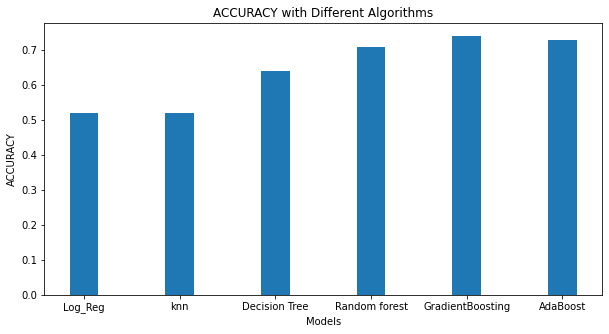

In [85]:

import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Log_Reg", "knn", "Decision Tree", "Random forest", "GradientBoosting", "AdaBoost"])

y = np.array([0.52, 0.52, 0.64 , 0.71 , 0.74, 0.73])

width = 0.3


plt.figure(figsize=[10,5])

plt.bar(x, y, width)

plt.xlabel('Models')
plt.ylabel('ACCURACY')

plt.title('ACCURACY with Different Algorithms')

plt.show()



# --
     The above graph tells that the models accuracy 

In [86]:
print('Logistic Regression Model Accuracy AFTER HP : ', accuracy_score(y_pred_for_log_reg2,y_test))

print('KNeighborsClassifier Model Accuracy AFTER HP : ', accuracy_score(y_pred_for_knn2,y_test))

print('DecisionTreeClassifier Model Accuracy AFTER HP : ', accuracy_score(y_pred_FOR_DT2,y_test))

print('RandomForestClassifier Model Accuracy AFTER HP : ', accuracy_score(y_pred_for_RF2,y_test))

print('GradientBoostingClassifier Model Accuracy AFTER HP : ', accuracy_score(y_pred_FOR_GB2,y_test))
 
print('AdaBoostClassifier Model Accuracy AFTER HP : ', accuracy_score(y_pred_FOR_AB2,y_test))



Logistic Regression Model Accuracy AFTER HP :  0.747
KNeighborsClassifier Model Accuracy AFTER HP :  0.5345
DecisionTreeClassifier Model Accuracy AFTER HP :  0.715
RandomForestClassifier Model Accuracy AFTER HP :  0.7075
GradientBoostingClassifier Model Accuracy AFTER HP :  0.747
AdaBoostClassifier Model Accuracy AFTER HP :  0.743


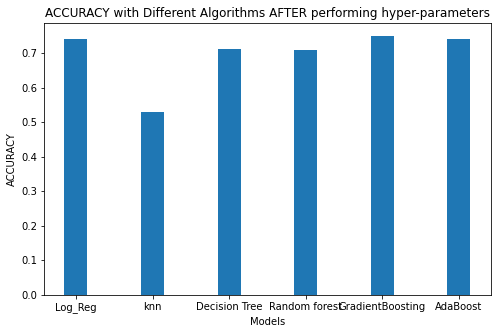

In [87]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Log_Reg", "knn", "Decision Tree", "Random forest", "GradientBoosting", "AdaBoost"])

y = np.array([0.74, 0.53, 0.711 , 0.71 , 0.75, 0.74])

width = 0.3


plt.figure(figsize=[8,5])

plt.bar(x, y, width)

plt.xlabel('Models')
plt.ylabel('ACCURACY')

plt.title('ACCURACY with Different Algorithms AFTER performing hyper-parameters')

plt.show()

# -- 
    the above graph tells the models accuracy after performing hyper-parameters..

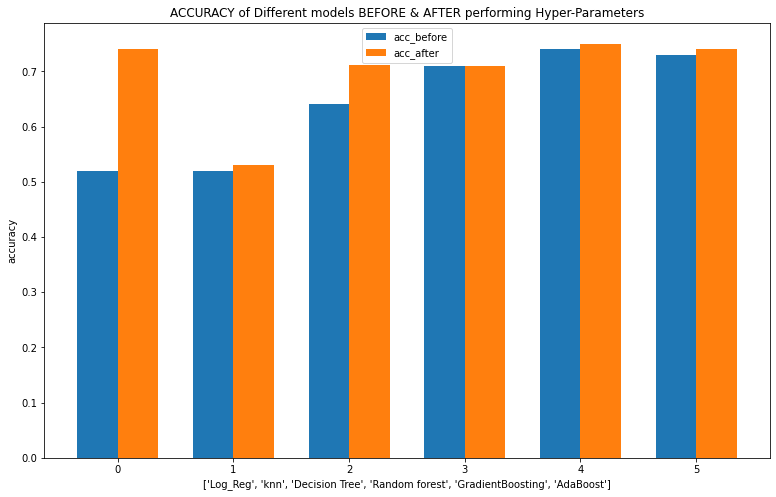

In [89]:
import matplotlib.pyplot as plt
import numpy as np


models = ["Log_Reg", "knn", "Decision Tree", "Random forest", "GradientBoosting", "AdaBoost"]

acc_before = np.array([0.52, 0.52, 0.64 , 0.71 , 0.74, 0.73])
acc_after = np.array([0.74, 0.53, 0.711 , 0.71 , 0.75, 0.74])


x = np.arange(len(models))  # the label locations

width = 0.35  # the width of the bars

#fig, ax = plt.subplots()

plt.figure(figsize=[13,8])


rects1 = plt.bar(x - width/2, acc_before, width, label='acc_before')
rects2 = plt.bar(x + width/2, acc_after, width, label='acc_after')

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.title('ACCURACY of Different models BEFORE & AFTER performing Hyper-Parameters')

plt.ylabel('accuracy')
plt.xlabel('Models')
#plt.xticks(x)
plt.xlabel(models)

plt.legend()

plt.show()

# --

    As from above one 
        0 - logistic regression = acc of base model & acc after performing hyper-parameter
        1 - knn = cc of base model & acc after performing hyper-parameter
        2 - Decision Tree = acc of base model & acc after performing hyper-parameter
        3 - Random Forest = acc of base model & acc after performing hyper-parameter
        4 - Gradient Boosting = acc of base model & acc after performing hyper-parameter
        5 - Ada Boosting = acc of base model & acc after performing hyper-parameter
    
    Here , 
    0. logistic reg = after performing the hyper-parameter this model is showing good accuracy..
        before = 0.52 == 52 %
        after = 0.74 == 74 %
    
    1. knn = there isn't much difference after performing hyper-parameter also 
        before = 0.51 == 52%
        after = 0.53 == 53%
        
    2. Decision Tree = the acc is slightly increasing here 
        before = 0.64 == 64
        afetr = 0.71 == 71
        
    3. Random Forest = there isn't much difference after performing hyper-parameter also
        before = 0.713 == 71%
        after = 0.74 == 72%
        
    4. Gradient Boosting = in this model the acc is greatly reduced i.e., the model is not performing well
        before = 0.74 == 74%
        after = 0.514 == 75%
        
    5. Ada Boost = there isn't much difference after performing hyper-parameter also
        before = 0.73 == 73%
        after = 0.74 == 74%
        


# conclusion

    Hyperparameters are important because they directly control the behaviour of the training model algorithm & have a significant impact on the performance of the model is being trained. ...

# --
    finally, we can tell ..
    
        logistic reg has great increase in accuracy after performing hyper-parameter..
        &
        Random Forest ,Gradient Boosting & Ada Boost are good before and after performing the hyper-parameters..
        

# --
    Random Forest , Gradient Boosting & Ada Boost are good models.